I've used the method of exploratory analysis for this assignment

Step 1(Understand the data):

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter('ignore')

In [ ]:
df=pd.read_csv("C:/Users/niles/Downloads/archive (1)/KAG_conversion_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv'

In [165]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


Step 2(Clean the data):

1.) Checking for null values

In [166]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

We verified that we don't have any null values in the dataset

Step 3 (Analysis of relationship between variables(columns)):

In [167]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


Correlation Matrix/ Relationship analysis

In [168]:
corelation = df.corr()

<AxesSubplot:>

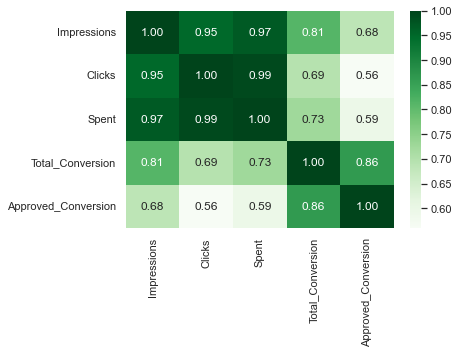

In [169]:
sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True ,fmt=".2f", cmap="Greens")

The heat map shows the relation between variables where 0 is the lowest and 1 is the highest, "Impressions" and "Total_Conversion" are more correlated with "Approved_Conversion" than "Clicks" and "Spent".

In [170]:
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178], dtype=int64)

To make the variables more understandable we rename them

In [171]:
df["xyz_campaign_id"].replace({916:"campaign1",936:"campaign2",1178:"campaign3"}, inplace=True)

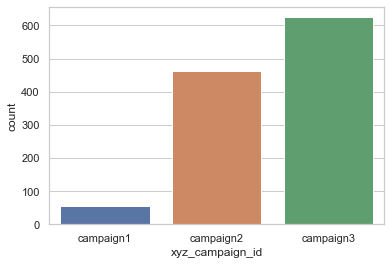

In [172]:
sns.countplot(x ='xyz_campaign_id', data = df) 
plt.show() 

This shows campaign3 has most number of ads.

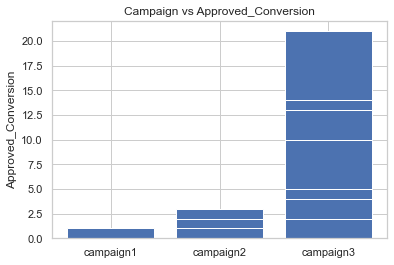

In [173]:
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("Campaign vs Approved_Conversion")
plt.show()

From the above graph we can analyze that campaign3 has most number of approved conversions

In [174]:
df['unsuccessfull_Conversion']= df['Total_Conversion']-df['Approved_Conversion']

We calculate the number of people who enquired about the product but didn't buy it

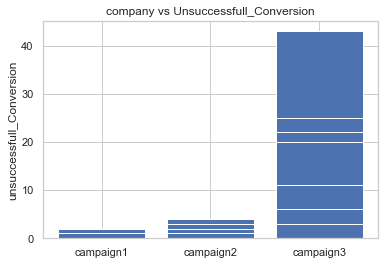

In [175]:
plt.bar(df["xyz_campaign_id"], df["unsuccessfull_Conversion"])
plt.ylabel("unsuccessfull_Conversion")
plt.title("company vs Unsuccessfull_Conversion")
plt.show()

With better approval count campaign3 also has a lot of unsucessfull conversions

We observe according to age to know our target audiance better.

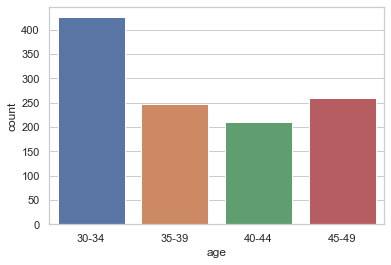

In [176]:
sns.countplot(x ='age', data = df) 
plt.show() 

Here we observe that the number of people from age group 30-34 are relatively high which points towards biased data set, suggesting henceforth data collection should be more randomised.

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

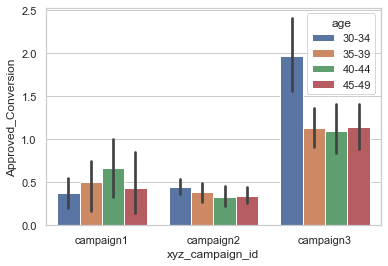

In [177]:
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"])

Here we have 3 observations:
In campaign1 the age group of 40-44 shows more interest.
In campaign3 and campaign2,the age group of 30-34 shows more interest

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='unsuccessfull_Conversion'>

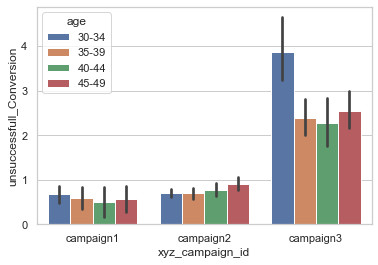

In [178]:
sns.barplot(x=df["xyz_campaign_id"], y=df["unsuccessfull_Conversion"], hue=df["age"], data=tips)

In campaign3 30-34 age group shows higher unsuccessfull coversions and in campaign1 and campaign2 has nearly same unsucessfull conversion rates.

Now we observe according to gender to know our target audiance better.

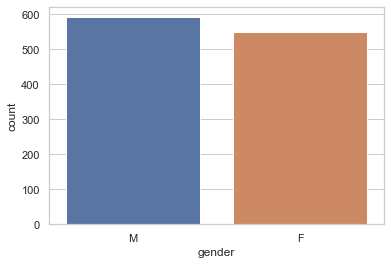

In [179]:
sns.countplot( data = df,x ='gender') 
plt.show() 

Here we can validate that the number of males and females in the sample dataset provided is nearly same and there is no gender biasness

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

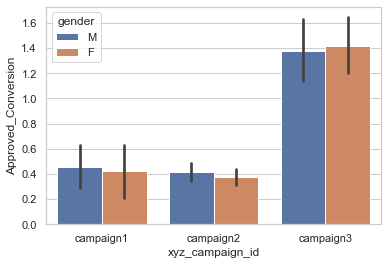

In [180]:
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"])

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

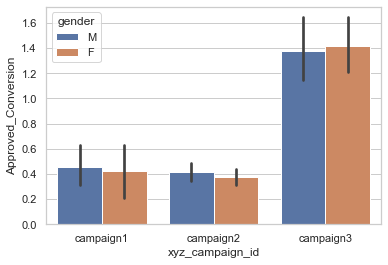

In [181]:
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"])

Both the genders shows similar trends in approved and unsucessfull conversion rates in all three campaigns.

We now look at the interests of people using similar age and gender factors.

In [182]:
df['higher_interest_audiance']=df[df['Approved_Conversion']>5]['interest']

To get a clear understanding and results we include ads with higher approved rate.

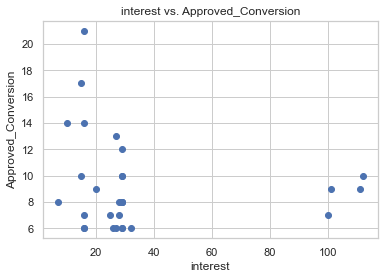

In [183]:
plt.scatter(df["higher_interest_audiance"], df["Approved_Conversion"])
plt.title("interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")
plt.show()

The overall approved_coversion is greater when interest is between 15-30. Though there are less number of people with interest higher than 100, there are more number of approved conversion

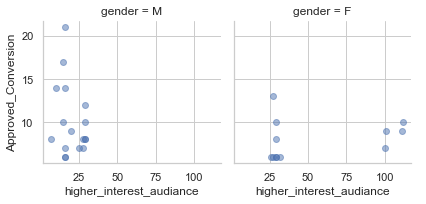

In [184]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "higher_interest_audiance", "Approved_Conversion", alpha=.5)
g.add_legend();

It is observed that males with interest 15-30 and females with interest over 100 tend to be higher at approved_conversions

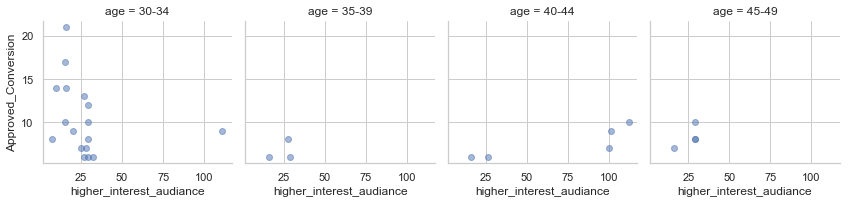

In [185]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "higher_interest_audiance", "Approved_Conversion", alpha=.5)
g.add_legend();

people aged 30-34, 45-49 and interest below 30 tend to buy products and people aged 40-44 having interest above 100 tend to buy more products. 

The amount spent on ads is also an important factor

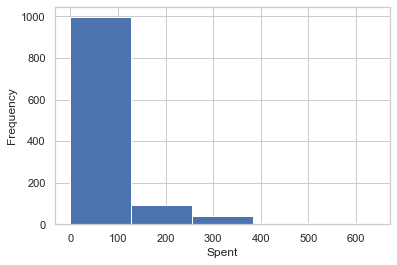

In [186]:
plt.hist(df['Spent'], bins = 5)
plt.xlabel("Spent")
plt.ylabel("Frequency")
plt.show()

In [187]:
df['spent_with_high_conversion']=df[df['Approved_Conversion']>5]['Spent']

To get a better visualization we consider spents where approved_conversion is above 5

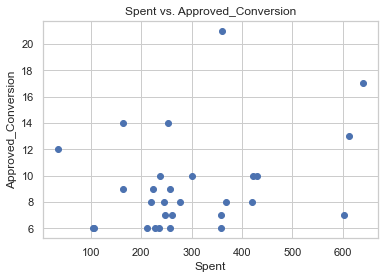

In [188]:
plt.scatter(df["spent_with_high_conversion"], df["Approved_Conversion"])
plt.title("Spent vs. Approved_Conversion")
plt.xlabel("Spent")
plt.ylabel("Approved_Conversion")
plt.show()

We can clearly see that spending more does not necessarily mean higher approved_conversions

We can see, as the amount of money spent increases, no of product bought increases.

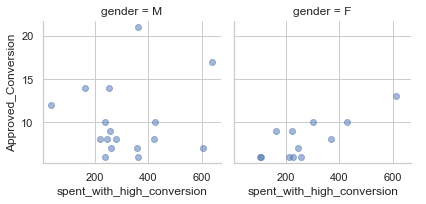

In [189]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "spent_with_high_conversion", "Approved_Conversion", alpha=.5)
g.add_legend();

We can observer that females tend to buy product even when the spent on ads is less

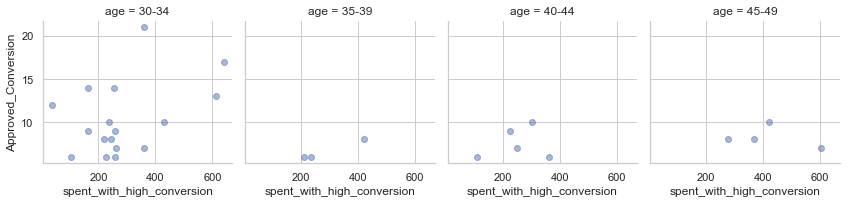

In [190]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "spent_with_high_conversion", "Approved_Conversion", alpha=.5)
g.add_legend();

The spent on ads doesn't depend much on the age group

Which gender bought the product after clicking

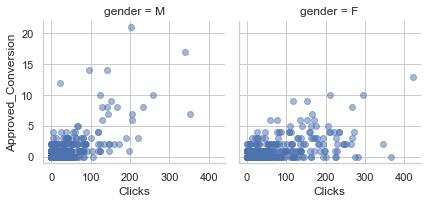

In [191]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.5)
g.add_legend();

We can observe that men buy products in less clicks than women

Which age group bought the product after clicking

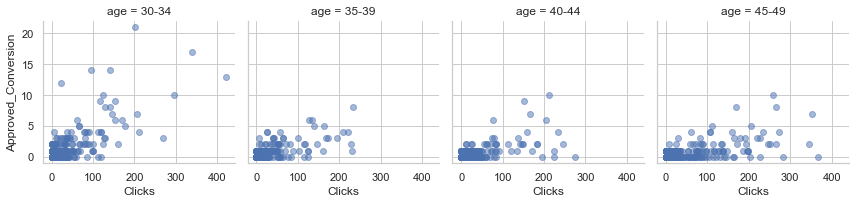

In [192]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.5)
g.add_legend();

People aged 45-49 take more clicks whereas people aged 30-34 have higher rate of buying product after fewer clicks

Report

Correlations:

"Impressions" and "Total_Conversion" are more correlated with "Approved_Conversion" than "Clicks" and "Spent".

campaign3 has most number of ads.
Most of the people have bought products from campaign3

Effect of Age group
The data set includes more number of people of age group 30-34 which may lead to biasness.
In campaign2 and campaign3, the age group of 30-34 shows more interest and in campaign1 the age group of 40-44 shows more interest.
Effect of gender
The number of males and females are same which shows there is no gender biasness into the dataset.
Both the genders shows similar interests in all three campaigns.

interest:

The overall approved_coversion is greater when interest is between 15-30. Though there are less number of people with interest higher than 100, there are more number of approved conversion.
It is observed that males with interest 15-30 and females with interest over 100 tend to be higher at approved_conversions.
people aged 30-34, 45-49 and interest below 30 tend to buy products and people aged 40-44 having interest above 100 tend to buy more products.


Money Spent:
We can clearly see that spending more does not necessarily mean higher approved_conversions.


1)How to optimize the social ad campaigns for the highest conversion rate possible. (Attain best Reach to Conversion ratios/Click to Conversion ratios)

Highest conversion rate was for campaign3 but also the highest unsuccessful_conversion rate. We can look at variables for campaign3
Ad count :number of ad counts should be more for better reach.
Target Audiance: People aged 30-34 of both genders can be included.

People with interest types 15-30 and after 100 can be considered as good audiance.

2)Finding the perfect target demographics with the appropriate clickthrough rates

men tend to buy the product more often after clicking the ad.
Also the age group 30 to 34 buy the product more often after clicking the ad and 45-49 have more clicks but less approved_coversion which removes their category from target audiance

3)Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.

Campaign3 can be labelled as the best campaign.